# Even / Odd training
N2N (Noise2Noise) denoising del volumen epfl1. Utiliza 2 volúmenes $V_1$ y $V_2$, donde $V_1$ es el volumen formado por los slices Z pares "even" y $V_2$ es el volumen formado por los slices Z impares "odd".

Todos los ficheros temporales se crean en `/nas/vruiz/cryoCARE/epfl1`.

## Creamos $V_1$ y $V_2$

In [1]:
%run even_odd_split.ipynb

noisy.shape=(150, 768, 1024)
Writing /nas/vruiz/cryoCARE/epfl1/even.mrc
noisy[0::2,:,:].shape=(75, 768, 1024)
Writing /nas/vruiz/cryoCARE/epfl1/odd.mrc
noisy[1::2,:,:].shape=(75, 768, 1024)


## Configuramos cryoCARE

In [2]:
%%writefile /nas/vruiz/cryoCARE/epfl1/train_data_config__evenodd.json
{
    "even": ["even.mrc"],
    "odd": ["odd.mrc"],
    "mask": [""],
    "patch_shape": [32, 32, 32],
    "num_slices": 360,
    "split": 0.9,
    "tilt_axis": "Y",
    "n_normalization_samples": 200,
    "path": "./even_odd_data",
    "overwrite": "True"  
}

Overwriting /nas/vruiz/cryoCARE/epfl1/train_data_config__evenodd.json


In [3]:
%%bash
cd /nas/vruiz/cryoCARE/epfl1
source ~/envs/cryoCARE/bin/activate
cryoCARE_extract_train_data.py --conf train_data_config__evenodd.json

2025-10-02 18:57:19.027795: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


even.data.shape=(75, 768, 1024), sample_shape=[32, 32, 32]
Computing normalization parameters:


100%|██████████| 200/200 [00:00<00:00, 2468.31it/s]


## Entrenamos

In [4]:
%%writefile /nas/vruiz/cryoCARE/epfl1/train_config__evenodd.json
{
  "train_data": "./even_odd_data",
  "epochs": 50,
  "steps_per_epoch": 200,
  "batch_size": 16,
  "unet_kern_size": 3,
  "unet_n_depth": 3,
  "unet_n_first": 16,
  "learning_rate": 0.0004,
  "model_name": "model",
  "path": "./",
  "gpu_id": [0, 1]
}

Overwriting /nas/vruiz/cryoCARE/epfl1/train_config__evenodd.json


In [5]:
%%bash
cd /nas/vruiz/cryoCARE/epfl1
source ~/envs/cryoCARE/bin/activate
cryoCARE_train.py --conf train_config__evenodd.json

2025-10-02 18:57:24.459654: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-02 18:57:26.080568: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-02 18:57:26.081981: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-02 18:57:26.108448: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-02 18:57:26.110498: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-02 18:57:26.110567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 0
GPU 0 successfully found
Looking for GPU with ID: 1
GPU 1 successfully found
0 1
1 32
2 32
3 32
4 1
Epoch 1/50


2025-10-02 18:57:31.722470: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2025-10-02 18:57:33.491884: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2025-10-02 18:57:33.635078: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-10-02 18:57:37.186755: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2025-10-02 18:57:37.608638: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2025-10-02 18:58:33.961767: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
20

200/200 [==============================] - 195s 367ms/step - loss: 0.1819 - mse: 0.1819 - mae: 0.3374 - val_loss: 0.1400 - val_mse: 0.1400 - val_mae: 0.2970
Epoch 2/50
200/200 [==============================] - 8s 39ms/step - loss: 0.1389 - mse: 0.1389 - mae: 0.2960 - val_loss: 0.1348 - val_mse: 0.1348 - val_mae: 0.2916
Epoch 3/50
200/200 [==============================] - 8s 39ms/step - loss: 0.1366 - mse: 0.1366 - mae: 0.2936 - val_loss: 0.1324 - val_mse: 0.1324 - val_mae: 0.2890
Epoch 4/50
200/200 [==============================] - 8s 38ms/step - loss: 0.1356 - mse: 0.1356 - mae: 0.2926 - val_loss: 0.1326 - val_mse: 0.1326 - val_mae: 0.2893
Epoch 5/50
200/200 [==============================] - 8s 38ms/step - loss: 0.1347 - mse: 0.1347 - mae: 0.2916 - val_loss: 0.1313 - val_mse: 0.1313 - val_mae: 0.2879
Epoch 6/50
200/200 [==============================] - 8s 38ms/step - loss: 0.1346 - mse: 0.1346 - mae: 0.2915 - val_loss: 0.1320 - val_mse: 0.1320 - val_mae: 0.2886
Epoch 7/50
200/200

/home/jupyter-vruiz/envs/cryoCARE/lib/python3.8/site-packages/csbdeep/models/base_model.py:149: UserWarning: output path for model already exists, files may be overwritten: /nas/vruiz/cryoCARE/epfl1/model
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))



Loading network weights from 'weights_best.h5'.


## Inferimos

In [6]:
%%writefile /nas/vruiz/cryoCARE/epfl1/predict_config__evenodd.json
{
    "path": "./model.tar.gz",
    "even": ["epfl1_subset1_float.mrc"], 
    "odd": ["epfl1_subset1_float.mrc"],
    "n_tiles": [1,1,1],
    "output": "even_odd_denoised",
    "overwrite": "True",
    "gpu_id": [0, 1]
}

Overwriting /nas/vruiz/cryoCARE/epfl1/predict_config__evenodd.json


In [7]:
%%bash
cd /nas/vruiz/cryoCARE/epfl1
pwd
source ~/envs/cryoCARE/bin/activate
cryoCARE_predict.py --conf predict_config__evenodd.json || true

/nas/vruiz/cryoCARE/epfl1


2025-10-02 19:07:07.458953: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-02 19:07:12.972035: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-02 19:07:12.972765: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-02 19:07:12.997045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-02 19:07:12.999113: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-02 19:07:12.999180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 0
GPU 0 successfully found
Looking for GPU with ID: 1
GPU 1 successfully found
Loading network weights from 'weights_best.h5'.
(152, 768, 1024, 1)
Out of memory, retrying with n_tiles = (1, 1, 2, 1)
Out of memory, retrying with n_tiles = (1, 2, 2, 1)


100%|██████████| 4/4 [00:10<00:00,  2.73s/it]    
Traceback (most recent call last):
  File "/home/jupyter-vruiz/envs/cryoCARE/bin/cryoCARE_predict.py", line 175, in <module>
    main()
  File "/home/jupyter-vruiz/envs/cryoCARE/bin/cryoCARE_predict.py", line 154, in main
    denoise(config, mean, std, even=even, odd=odd, output_file=out_filename)
  File "/home/jupyter-vruiz/envs/cryoCARE/bin/cryoCARE_predict.py", line 96, in denoise
    new_label = np.concatenate((even.header[l][1:-1], np.array([
  File "<__array_function__ internals>", line 5, in concatenate
UnicodeDecodeError: 'ascii' codec can't decode byte 0x81 in position 3: ordinal not in range(128)


In [8]:
import mrcfile
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [9]:
def read_MRC(path_file):
    return mrcfile.read(mrc_file_path)

In [10]:
mrc_file_path = '/nas/vruiz/cryoCARE/epfl1/epfl1_subset1_float.mrc'
original_volume = read_MRC(mrc_file_path)

In [11]:
original_volume.shape

(150, 768, 1024)

In [12]:
mrc_file_path = '/nas/vruiz/cryoCARE/epfl1/even_odd_denoised/epfl1_subset1_float.mrc'
denoised_volume = read_MRC(mrc_file_path)

In [13]:
denoised_volume.shape

(150, 768, 1024)

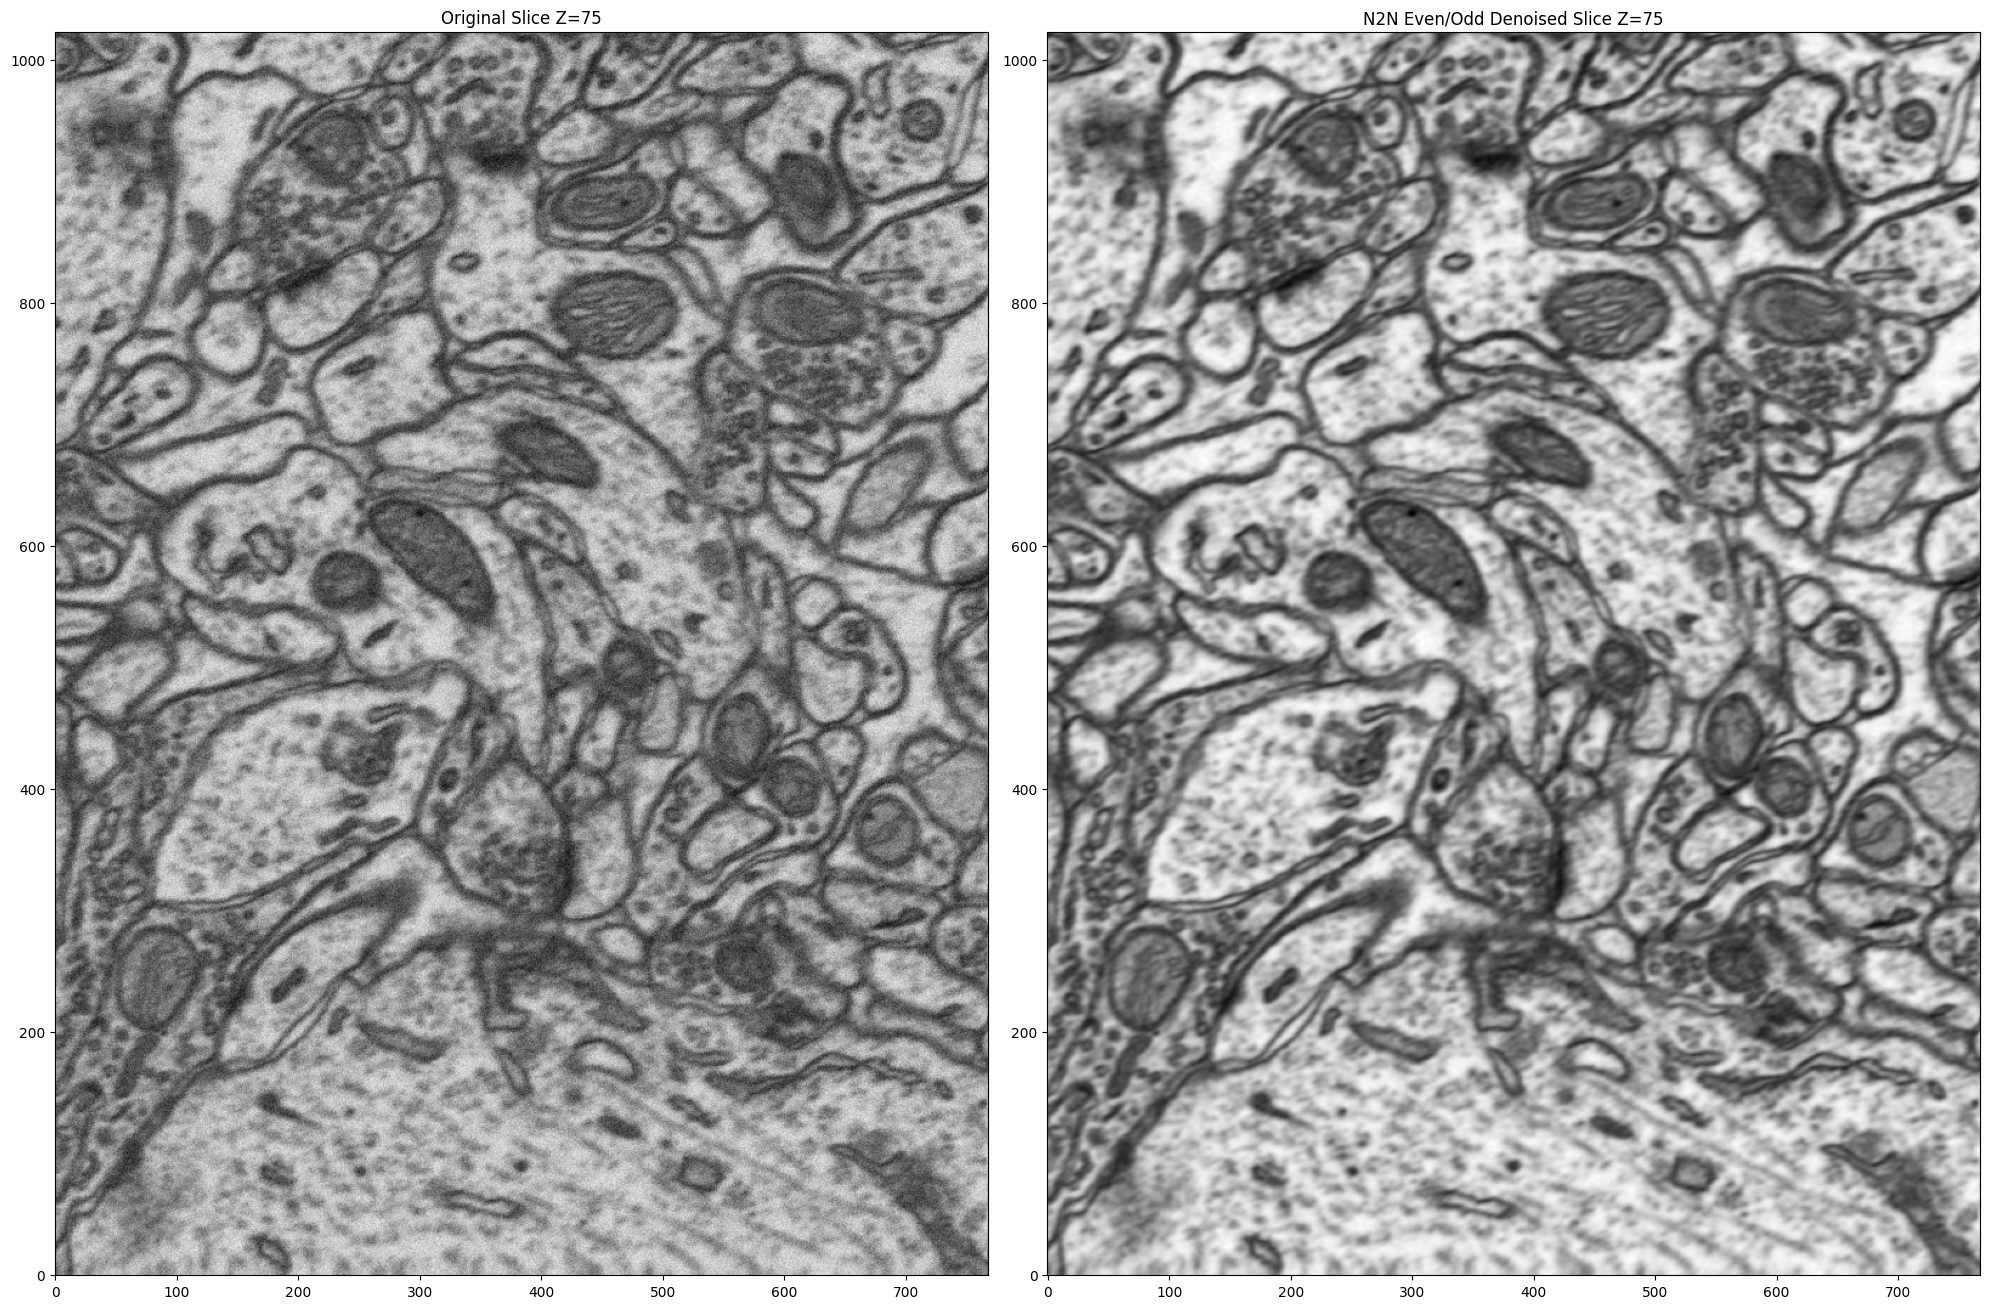

In [14]:
# Choose a slice index in the middle of the volume for a good comparison
slice_idx = original_volume.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_volume[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_volume[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N Even/Odd Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

In [3]:
%pip install "self_fourier_shell_correlation @ git+https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation"

  Cloning https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation to /tmp/pip-install-qunn6n7e/self-fourier-shell-correlation_6137bacb62924b95aea8da9bffb8a83b
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation /tmp/pip-install-qunn6n7e/self-fourier-shell-correlation_6137bacb62924b95aea8da9bffb8a83b
  Resolved https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation to commit f785ed2aa883d5362036cc66d26498286c9a48ff
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for self_fourier_shell_correlation: filename=self_fourier_shell_correlation-0.0.1-py3-none-any.whl size=21626 sha256=385f40481eaa82322cc6f78b9adc8303817d5219ecbb9e2bf7c2b5bf14ab1852
  Stored in directory: /tmp/pip-ephem-wheel-cache-7ynnucda/wheels/0c/c0/88/a3401dd3fbe79196f4fbb82f0eab4016ee5bc623f40ef3b69d
Successfully bu

In [4]:
%pip show self_fourier_shell_correlation

Name: self_fourier_shell_correlation
Version: 0.0.1
Summary: Self Fourier shell correlation (https://www.nature.com/articles/s42003-023-05724-y)
Home-page: https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation
Author: 
Author-email: "Eric J. Verbeke" <ev9102@princeton.edu>, Vicente González Ruiz <vicente.gonzalez.ruiz@gmail.com>
License: 
Location: /nas/vruiz/envs/cryoCARE/lib/python3.8/site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
print(sys.executable)

/home/jupyter-vruiz/envs/cryoCARE/bin/python


In [5]:
%pip install "shuffling @ git+https://github.com/vicente-gonzalez-ruiz/shuffling"

  Cloning https://github.com/vicente-gonzalez-ruiz/shuffling to /tmp/pip-install-hvj6fi3o/shuffling_3f860d259c594094b89762fc3575088b
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/shuffling /tmp/pip-install-hvj6fi3o/shuffling_3f860d259c594094b89762fc3575088b
  Resolved https://github.com/vicente-gonzalez-ruiz/shuffling to commit 0710ed80bd40725b8fd116352c8e58a97f96528b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install "motion_estimation @ git+https://github.com/vicente-gonzalez-ruiz/motion_estimation"

  Cloning https://github.com/vicente-gonzalez-ruiz/motion_estimation to /tmp/pip-install-v2hjugss/motion-estimation_9ab642a2ca0e46c992616d48f6a19d9a
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/motion_estimation /tmp/pip-install-v2hjugss/motion-estimation_9ab642a2ca0e46c992616d48f6a19d9a
  Resolved https://github.com/vicente-gonzalez-ruiz/motion_estimation to commit 1f5e6bbf388db38c054f3ae38b4e82f074f7b493
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [8]:
from self_fourier_shell_correlation import fsc_utils as fsc

In [9]:
import mrcfile

In [10]:
import matplotlib.pyplot as plt

In [11]:
even = mrcfile.read("/nas/vruiz/cryoCARE/epfl1/even.mrc")

In [12]:
odd = mrcfile.read("/nas/vruiz/cryoCARE/epfl1/odd.mrc")

In [6]:
import numpy as np
from scipy.fft import fftn

In [34]:
def compute_spatial_frequencies(shape):
    """
    Compute the spatial frequency grid for a volume of arbitrary shape.
    
    Args:
        shape: Tuple representing the shape of the volume (nx, ny, nz).
        
    Returns:
        freq_radii: A 3D array where each element represents the spatial frequency radius at that point.
    """
    freq_x = np.fft.fftfreq(shape[0])
    freq_y = np.fft.fftfreq(shape[1])
    freq_z = np.fft.fftfreq(shape[2])

    freq_x, freq_y, freq_z = np.meshgrid(freq_x, freq_y, freq_z, indexing='ij')

    freq_radii = np.sqrt(freq_x**2 + freq_y**2 + freq_z**2)

    return freq_radii

def fourier_shell_correlation(volume1, volume2, shell_thickness=1):
    """
    Compute the Fourier Shell Correlation (FSC) between two volumes of arbitrary shape.
    Args:
        volume1, volume2: Two 3D volumes to compare
        shell_thickness: Thickness of Fourier shells in frequency units
    Returns:
        spatial_freq: Array of spatial frequencies (1/voxel units)
        fsc_values: Array of FSC values at each spatial frequency
    """
    # Fourier transforms of both volumes (in double precision and normalized)
    fft1 = fftn(volume1).astype(np.complex128) / np.sqrt(np.prod(volume1.shape))
    fft2 = fftn(volume2).astype(np.complex128) / np.sqrt(np.prod(volume2.shape))

    # Compute spatial frequency grid based on the volume shape
    freq_radii = compute_spatial_frequencies(volume1.shape)

    max_radius = np.max(freq_radii)
    shell_indices = np.arange(0, max_radius, shell_thickness)

    fsc_values = []
    spatial_freq = []

    for r in shell_indices:
        shell_mask = (freq_radii >= r) & (freq_radii < r + shell_thickness)
        
        # Numerator and denominator of the FSC
        num = np.sum(fft1[shell_mask] * np.conj(fft2[shell_mask]))
        denom = np.sqrt(np.sum(np.abs(fft1[shell_mask])**2) * np.sum(np.abs(fft2[shell_mask])**2))
        
        # Handle potential division by zero
        fsc_value = np.abs(num) / denom if denom != 0 else 0
        fsc_values.append(fsc_value)
        spatial_freq.append(r)

    return np.array(spatial_freq), np.array(fsc_values)

In [13]:
spatial_freq, fsc_values = fsc.fourier_shell_correlation(even, odd, shell_thickness=0.01)

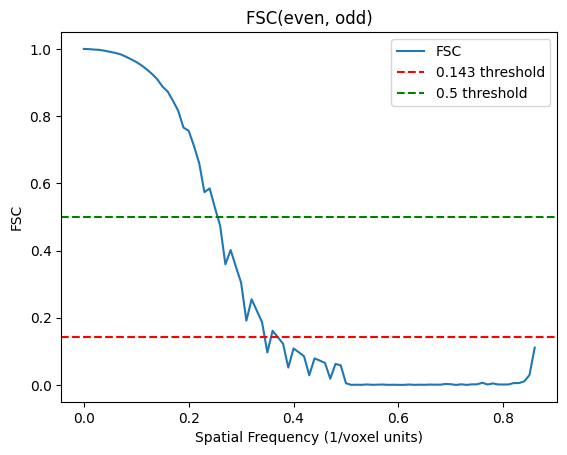

In [14]:
fsc.plot_fsc(spatial_freq, fsc_values, "Spatial Frequency (1/voxel units)", "FSC", "FSC(even, odd)")